In [69]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

## LOADING THE DATASET

In [90]:
data=pd.read_csv('/content/creditcard.csv')
#make a copy of the data for reference sake
df=data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [92]:
df['V22'] = pd.to_numeric(df['V22'], errors='coerce')

In [72]:
df=df.dropna()

## DATA OVERVIEW
- The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

- Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.




## EXPLORATORY DATA ANALYSIS

In [73]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33759 entries, 0 to 33758
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33759 non-null  int64  
 1   V1      33759 non-null  float64
 2   V2      33759 non-null  float64
 3   V3      33759 non-null  float64
 4   V4      33759 non-null  float64
 5   V5      33759 non-null  float64
 6   V6      33759 non-null  float64
 7   V7      33759 non-null  float64
 8   V8      33759 non-null  float64
 9   V9      33759 non-null  float64
 10  V10     33759 non-null  float64
 11  V11     33759 non-null  float64
 12  V12     33759 non-null  float64
 13  V13     33759 non-null  float64
 14  V14     33759 non-null  float64
 15  V15     33759 non-null  float64
 16  V16     33759 non-null  float64
 17  V17     33759 non-null  float64
 18  V18     33759 non-null  float64
 19  V19     33759 non-null  float64
 20  V20     33759 non-null  float64
 21  V21     33759 non-null  float64
 22

Due to DATA PRIVACY, the features that defines these dataset are hidden to protect customers right, however we have time, amount and class and hopefully with the trends and patterns from other features, we can get meaningful results.

In [74]:
# check for missing values
total =df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are no missing values in any of the features, which is good

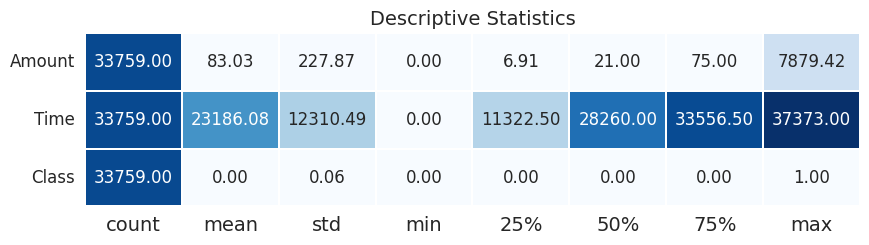

In [75]:
# statistical summary:
cols =df[["Amount","Time","Class"]]
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()

desc_stats(cols)

In [76]:
# correlation matrix
plt.figure(figsize=(15,10))
corr = df.corr()
corr.style.background_gradient(cmap='summer_r')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.017816,-0.107529,-0.065867,-0.033503,-0.075566,-0.019869,-0.010856,0.039393,-0.328317,0.108084,-0.191345,0.375301,-0.340894,-0.259639,0.151710,0.022902,-0.112165,-0.050773,0.028225,0.014098,0.024000,0.052342,-0.011084,-0.013278,0.056925,-0.035307,-0.003964,-0.000971,0.069997,-0.012079
V1,0.017816,1.000000,-0.133990,0.312937,-0.104749,0.098165,0.107076,0.182607,-0.098015,-0.030385,0.035548,-0.035572,0.057223,0.008970,0.142623,0.046849,0.121243,0.102392,0.004193,0.010109,-0.092081,-0.066833,-0.000349,-0.050639,-0.009858,0.183771,0.025017,-0.143281,0.189871,-0.214837,-0.225919
V2,-0.107529,-0.133990,1.000000,-0.249487,0.120289,-0.133292,-0.021044,-0.055907,0.068811,-0.016393,-0.013526,0.101993,-0.129272,0.063243,-0.095369,0.055122,-0.056021,-0.093247,-0.013098,-0.017295,-0.078306,0.032870,-0.103572,-0.002019,-0.023471,-0.095659,-0.049774,0.055877,0.047638,-0.500774,0.205768
V3,-0.065867,0.312937,-0.249487,1.000000,-0.154739,0.312616,0.008044,0.360343,-0.292925,0.167489,0.205028,-0.135501,0.128696,-0.005596,0.234125,-0.170564,0.028450,0.181296,0.040537,-0.039049,-0.095805,-0.000013,0.239063,0.056617,0.030216,-0.188387,0.061514,-0.181277,0.071175,-0.166588,-0.412469
V4,-0.033503,-0.104749,0.120289,-0.154739,1.000000,-0.075003,-0.044101,-0.110834,0.095172,-0.030763,-0.095111,0.051168,-0.096129,0.038494,-0.069602,-0.108039,-0.151701,-0.001987,-0.030581,-0.022916,0.018350,-0.000966,-0.008589,-0.010681,-0.016966,-0.015852,0.028176,0.066231,-0.036025,0.096631,0.223332
V5,-0.075566,0.098165,-0.133292,0.312616,-0.075003,1.000000,0.093087,0.074511,-0.120081,0.043673,0.147785,-0.060166,0.043903,0.048563,0.095538,0.076877,0.126825,0.052695,0.090932,0.001896,-0.000849,-0.053290,-0.073301,0.028322,-0.007450,-0.052389,-0.046990,-0.126481,0.015301,-0.373715,-0.207427
V6,-0.019869,0.107076,-0.021044,0.008044,-0.044101,0.093087,1.000000,0.102175,-0.065968,0.050375,0.046467,-0.100553,0.009814,0.015918,0.074938,-0.112863,0.013880,0.029175,0.051430,0.090103,-0.012061,0.044955,0.015185,-0.012064,0.018668,0.059581,0.013457,-0.021567,-0.022680,0.213699,-0.101126
V7,-0.010856,0.182607,-0.055907,0.360343,-0.110834,0.074511,0.102175,1.000000,-0.138626,0.047518,0.180042,-0.116898,0.175578,-0.017482,0.100266,0.074162,0.131502,0.143868,0.094044,-0.052262,0.010966,-0.075327,0.008973,0.068886,-0.000698,-0.121858,-0.041180,-0.150365,-0.057180,0.337312,-0.331990
V8,0.039393,-0.098015,0.068811,-0.292925,0.095172,-0.120081,-0.065968,-0.138626,1.000000,-0.068505,-0.145769,0.025565,-0.076789,-0.019264,-0.073664,-0.022440,-0.061842,-0.087945,-0.029342,0.021599,0.062188,-0.128982,0.050736,-0.056567,0.004776,0.036720,-0.001699,0.056503,0.078879,-0.074457,0.168806
V9,-0.328317,-0.030385,-0.016393,0.167489,-0.030763,0.043673,0.050375,0.047518,-0.068505,1.000000,-0.043383,0.091280,-0.252078,0.239595,0.266424,-0.209096,-0.064453,0.225494,0.098002,-0.045544,0.015044,-0.024534,0.006304,-0.033252,0.007100,0.095835,0.078917,-0.053929,-0.060042,-0.022678,-0.144466


<Figure size 1500x1000 with 0 Axes>

We can see that a particular feature "V7" is correlating largely to the amount feature

In [77]:
# check for class imbalance

temp = df["Class"].value_counts()
df1 = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df1['Class'],y = df1['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Blue"),
    text=df1['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class)',
          xaxis = dict(title = 'Class', showticklabels=True),
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

we can see the imbalance in real effect where 0 = Non Fraudulent transactions and 1 = Fraudulent transactions

In [78]:
# making Hour feature from Time feature
df["Hour"] = df["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df["Hour"] = df["Hour"].astype("int")

## DATA VISUALIZATION

In [79]:
# Distribution of Fraud and Normal Transactions
px.pie(df, names="Class", title="Distribution of Fraud and Normal Transactions:(Normal:0 | Fraud:1)", color_discrete_sequence=['#1E90FF', '#FF4500'],
       template="plotly_dark", width=600, height=400)

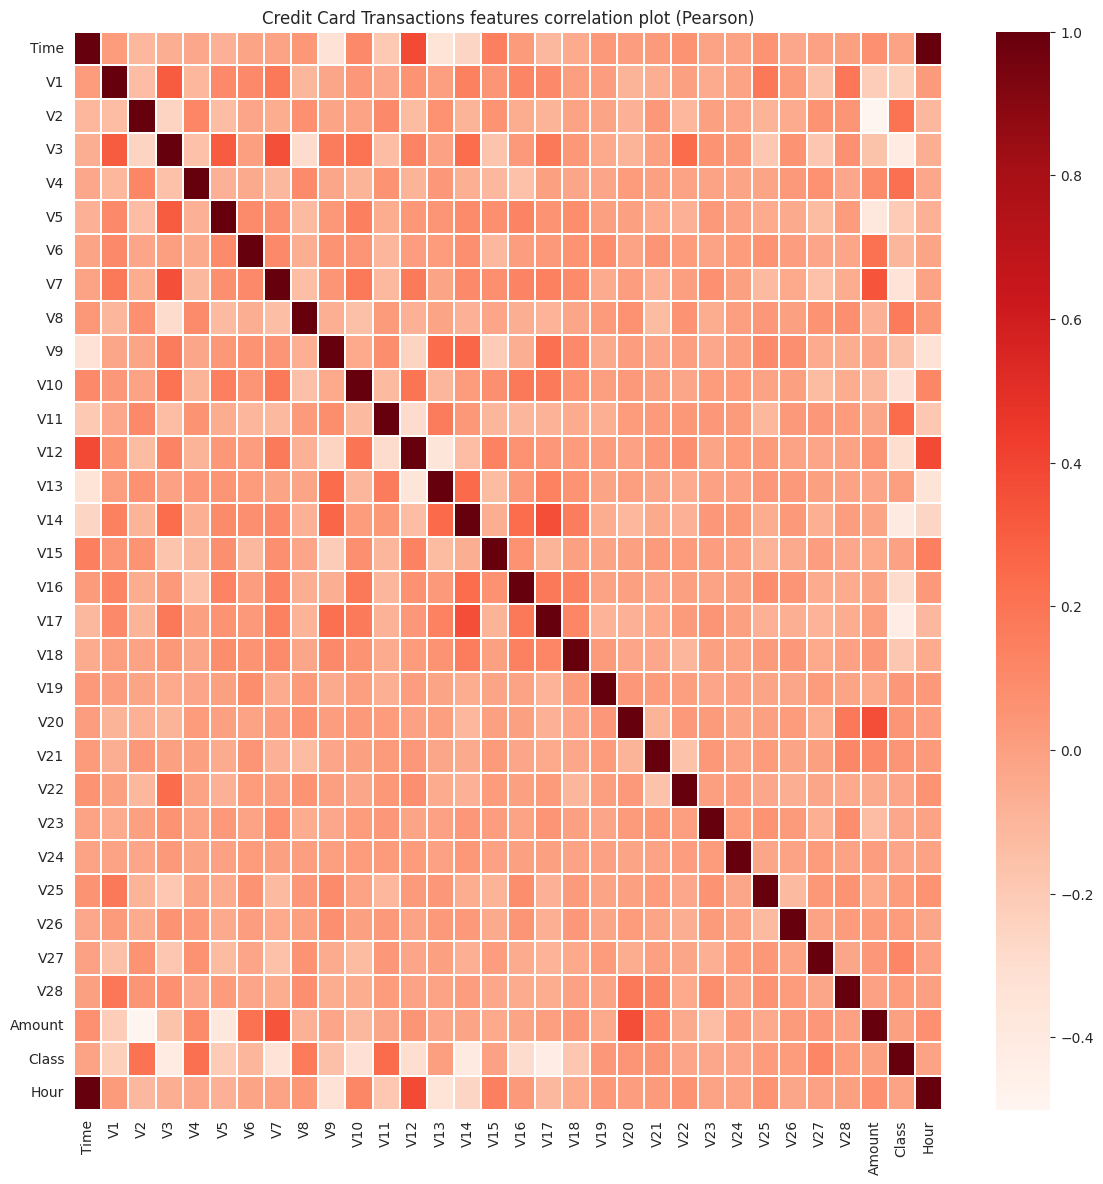

In [80]:
# correlation heatmap:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [81]:
# time vs fraud

# Transaction count with non frauds over time(Hour)
count_0 = df[df['Class']==0].groupby('Hour').count()["Class"]

# Transaction count with frauds over time(Hour)
count_1 = df[df['Class']==1].groupby('Hour').count()["Class"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class 0", "Class 1"]).fillna(0)
df_counts = counts_df.reset_index()


# Subplots
fig = make_subplots(
    rows=1, cols=2,

    subplot_titles=("Non Frauds","Frauds"))

fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 0"], name="Transactions", marker = {'color' : "#1E90FF"}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 1"], name="Transactions", marker = {'color' : "#FF4500"}),
                 row=1, col=2)

fig['layout']['xaxis']['title']='Hour'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Hour'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()

## DATA PREPROCESSING

In [82]:
#SPLIT THE DATA
X=df.drop(["Class"],axis=1).values
y=df["Class"].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
# standardization of data
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## TRAINNG AND EVALUATION OF MODEL

In [84]:
# model building

knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
lr=LogisticRegression()


models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

KNeighborsClassifier Model Test Accuracy Score is:  0.9989632701421801
KNeighborsClassifier Model Test F1 Score is:  0.8444444444444444
KNeighborsClassifier Mean_absolute_error:  0.0010367298578199053
KNeighborsClassifier Mean_squared_error:  0.0010367298578199053
KNeighborsClassifier Root_mean_squared_error:  0.03219828967227771
KNeighborsClassifier R2_score:  0.7072929052715022
KNeighborsClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.90      0.79      0.84        24

    accuracy                           1.00      6752
   macro avg       0.95      0.90      0.92      6752
weighted avg       1.00      1.00      1.00      6752



SVC Model Test Accuracy Score is:  0.9989632701421801
SVC Model Test F1 Score is:  0.8444444444444444
SVC Mean_absolute_error:  0.0010367298578199053
SVC Mean_squared_error:  0.0010367298578199053
SVC Root_mean_squared_error:  0.03219828967227771
SVC R2_score:  0.7072929052715022
SVC Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.90      0.79      0.84        24

    accuracy                           1.00      6752
   macro avg       0.95      0.90      0.92      6752
weighted avg       1.00      1.00      1.00      6752



GaussianNB Model Test Accuracy Score is:  0.976303317535545
GaussianNB Model Test F1 Score is:  0.20792079207920794
GaussianNB Mean_absolute_error:  0.023696682464454975
GaussianNB Mean_squared_error:  0.023696682464454975
GaussianNB Root_mean_squared_error:  0.1539372679517698
GaussianNB R2_score:  -5.690447879508522
GaussianNB Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6728
         1.0       0.12      0.88      0.21        24

    accuracy                           0.98      6752
   macro avg       0.56      0.93      0.60      6752
weighted avg       1.00      0.98      0.99      6752



DecisionTreeClassifier Model Test Accuracy Score is:  0.9991113744075829
DecisionTreeClassifier Model Test F1 Score is:  0.8695652173913043
DecisionTreeClassifier Mean_absolute_error:  0.0008886255924170616
DecisionTreeClassifier Mean_squared_error:  0.0008886255924170616
DecisionTreeClassifier Root_mean_squared_error:  0.029809823756893658
DecisionTreeClassifier R2_score:  0.7491082045184305
DecisionTreeClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.91      0.83      0.87        24

    accuracy                           1.00      6752
   macro avg       0.95      0.92      0.93      6752
weighted avg       1.00      1.00      1.00      6752



RandomForestClassifier Model Test Accuracy Score is:  0.9989632701421801
RandomForestClassifier Model Test F1 Score is:  0.851063829787234
RandomForestClassifier Mean_absolute_error:  0.0010367298578199053
RandomForestClassifier Mean_squared_error:  0.0010367298578199053
RandomForestClassifier Root_mean_squared_error:  0.03219828967227771
RandomForestClassifier R2_score:  0.7072929052715022
RandomForestClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.87      0.83      0.85        24

    accuracy                           1.00      6752
   macro avg       0.93      0.92      0.93      6752
weighted avg       1.00      1.00      1.00      6752



XGBClassifier Model Test Accuracy Score is:  0.9992594786729858
XGBClassifier Model Test F1 Score is:  0.888888888888889
XGBClassifier Mean_absolute_error:  0.000740521327014218
XGBClassifier Mean_squared_error:  0.000740521327014218
XGBClassifier Root_mean_squared_error:  0.027212521511506757
XGBClassifier R2_score:  0.7909235037653587
XGBClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.95      0.83      0.89        24

    accuracy                           1.00      6752
   macro avg       0.98      0.92      0.94      6752
weighted avg       1.00      1.00      1.00      6752



[LightGBM] [Info] Number of positive: 79, number of negative: 26928
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7662
[LightGBM] [Info] Number of data points in the train set: 27007, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002925 -> initscore=-5.831474
[LightGBM] [Info] Start training from score -5.831474
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

GradientBoostingClassifier Model Test Accuracy Score is:  0.9985189573459715
GradientBoostingClassifier Model Test F1 Score is:  0.7916666666666666
GradientBoostingClassifier Mean_absolute_error:  0.001481042654028436
GradientBoostingClassifier Mean_squared_error:  0.001481042654028436
GradientBoostingClassifier Root_mean_squared_error:  0.03848431698794245
GradientBoostingClassifier R2_score:  0.5818470075307174
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.79      0.79      0.79        24

    accuracy                           1.00      6752
   macro avg       0.90      0.90      0.90      6752
weighted avg       1.00      1.00      1.00      6752



AdaBoostClassifier Model Test Accuracy Score is:  0.9988151658767772
AdaBoostClassifier Model Test F1 Score is:  0.8333333333333334
AdaBoostClassifier Mean_absolute_error:  0.001184834123222749
AdaBoostClassifier Mean_squared_error:  0.001184834123222749
AdaBoostClassifier Root_mean_squared_error:  0.034421419541075714
AdaBoostClassifier R2_score:  0.665477606024574
AdaBoostClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.83      0.83      0.83        24

    accuracy                           1.00      6752
   macro avg       0.92      0.92      0.92      6752
weighted avg       1.00      1.00      1.00      6752



LogisticRegression Model Test Accuracy Score is:  0.9979265402843602
LogisticRegression Model Test F1 Score is:  0.6666666666666666
LogisticRegression Mean_absolute_error:  0.0020734597156398106
LogisticRegression Mean_squared_error:  0.0020734597156398106
LogisticRegression Root_mean_squared_error:  0.045535257939752695
LogisticRegression R2_score:  0.41458581054300436
LogisticRegression Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.78      0.58      0.67        24

    accuracy                           1.00      6752
   macro avg       0.89      0.79      0.83      6752
weighted avg       1.00      1.00      1.00      6752



In [85]:
# comparing all model accuracy:

models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

fig=px.bar(x=[type(model).__name__ for model in models], y=[accuracy_score(y_test, model.predict(X_test)) for model in models],
         color=[accuracy_score(y_test, model.predict(X_test)) for model in models], color_continuous_scale="Viridis",
            title="Model Comparison", labels=dict(x="Model", y="Accuracy"), template="plotly_dark", width=800,
            height=600,text=[accuracy_score(y_test, model.predict(X_test)) for model in models])
#fig.update_layout(yaxis_range=[0.97,0.99])
fig.show()

## FEATURE IMPORTANCE

RandomForestClassifier Model Feature Importance: 



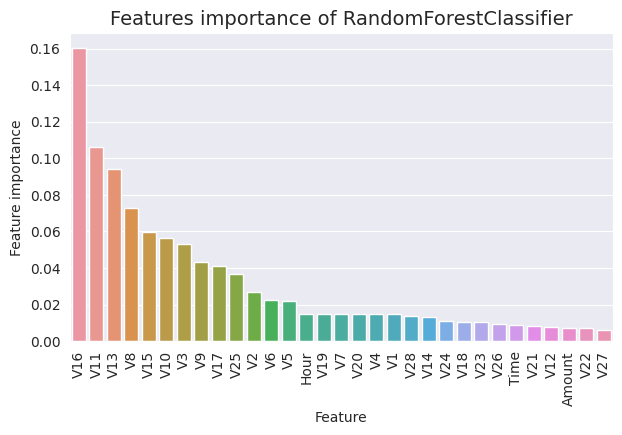

XGBClassifier Model Feature Importance: 



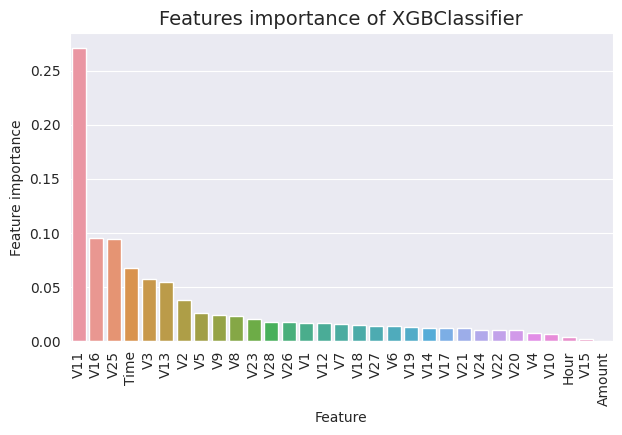

LGBMClassifier Model Feature Importance: 



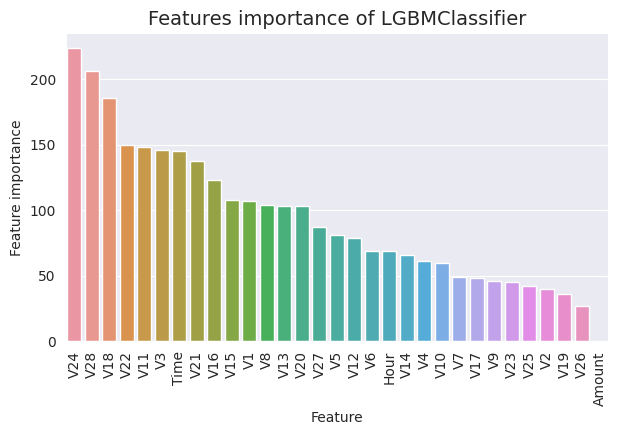

GradientBoostingClassifier Model Feature Importance: 



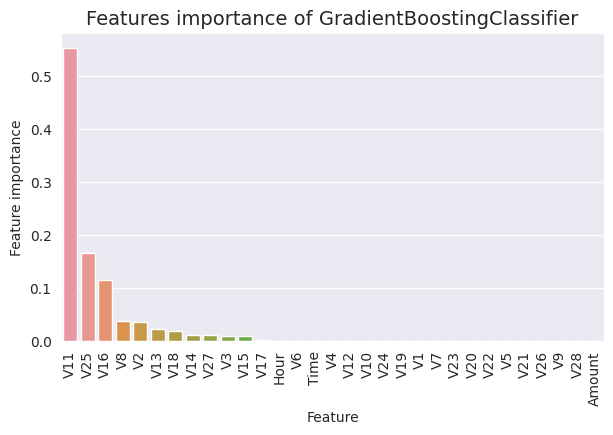

DecisionTreeClassifier Model Feature Importance: 



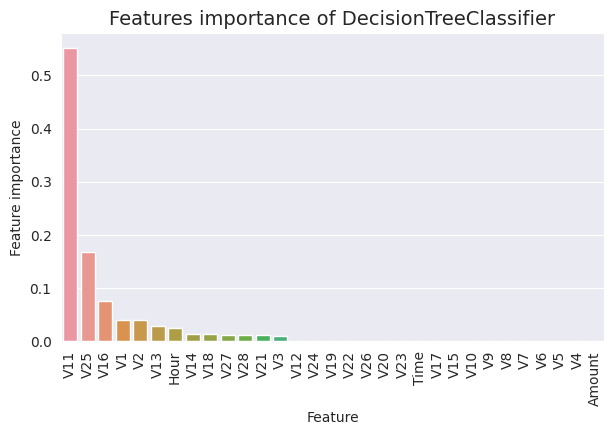

In [86]:
# Feature Importance

# for all models

models = [rfc, xgb, lgb, gbc,svc,dtc, lr]

target = 'Class'
predictors = ['Time',"Hour", 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

for model in models:
    # there is no feature importance attribute in SVC and Logistic regression
    if model == svc or model == lr:
           continue
    print(type(model).__name__, "Model Feature Importance: \n")
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance of '+type(model).__name__,fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

## PCA

Text(0.5, 1.0, 'PCA: 2 Component')

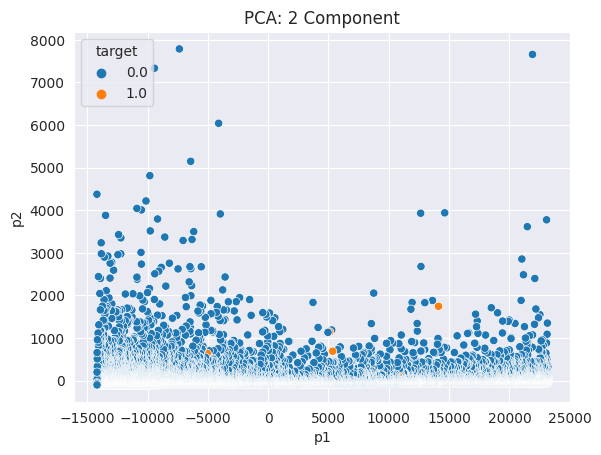

In [87]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)

#visualization of reduced data:
sns.set_style("darkgrid")
pca_data=pd.DataFrame(X_reduced,columns=["p1","p2"])
pca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
plt.title("PCA: 2 Component")

In [88]:
# after pca, model building

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.2,random_state=42)

models =[knn,rfc,xgb,gbc,svc,dtc,lr]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

KNeighborsClassifier Model Test Accuracy Score is:  0.9965936018957346
KNeighborsClassifier Model Test F1 Score is:  0.07999999999999999
KNeighborsClassifier Mean_absolute_error:  0.003406398104265403
KNeighborsClassifier Mean_squared_error:  0.003406398104265403
KNeighborsClassifier Root_mean_squared_error:  0.058364356453792954
KNeighborsClassifier R2_score:  0.03824811732065003
KNeighborsClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       1.00      0.04      0.08        24

    accuracy                           1.00      6752
   macro avg       1.00      0.52      0.54      6752
weighted avg       1.00      1.00      1.00      6752



RandomForestClassifier Model Test Accuracy Score is:  0.9958530805687204
RandomForestClassifier Model Test F1 Score is:  0.06666666666666667
RandomForestClassifier Mean_absolute_error:  0.004146919431279621
RandomForestClassifier Mean_squared_error:  0.004146919431279621
RandomForestClassifier Root_mean_squared_error:  0.06439657934455542
RandomForestClassifier R2_score:  -0.17082837891399127
RandomForestClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.17      0.04      0.07        24

    accuracy                           1.00      6752
   macro avg       0.58      0.52      0.53      6752
weighted avg       0.99      1.00      0.99      6752



XGBClassifier Model Test Accuracy Score is:  0.996149289099526
XGBClassifier Model Test F1 Score is:  0.07142857142857142
XGBClassifier Mean_absolute_error:  0.0038507109004739335
XGBClassifier Mean_squared_error:  0.0038507109004739335
XGBClassifier Root_mean_squared_error:  0.062054096564803304
XGBClassifier R2_score:  -0.08719778042013471
XGBClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.25      0.04      0.07        24

    accuracy                           1.00      6752
   macro avg       0.62      0.52      0.53      6752
weighted avg       0.99      1.00      0.99      6752



GradientBoostingClassifier Model Test Accuracy Score is:  0.9955568720379147
GradientBoostingClassifier Model Test F1 Score is:  0.0625
GradientBoostingClassifier Mean_absolute_error:  0.004443127962085308
GradientBoostingClassifier Mean_squared_error:  0.004443127962085308
GradientBoostingClassifier Root_mean_squared_error:  0.06665679231770238
GradientBoostingClassifier R2_score:  -0.25445897740784784
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.12      0.04      0.06        24

    accuracy                           1.00      6752
   macro avg       0.56      0.52      0.53      6752
weighted avg       0.99      1.00      0.99      6752



SVC Model Test Accuracy Score is:  0.9964454976303317
SVC Model Test F1 Score is:  0.0
SVC Mean_absolute_error:  0.0035545023696682463
SVC Mean_squared_error:  0.0035545023696682463
SVC Root_mean_squared_error:  0.059619647513787316
SVC R2_score:  -0.00356718192627814
SVC Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.00      0.00      0.00        24

    accuracy                           1.00      6752
   macro avg       0.50      0.50      0.50      6752
weighted avg       0.99      1.00      0.99      6752



DecisionTreeClassifier Model Test Accuracy Score is:  0.9940758293838863
DecisionTreeClassifier Model Test F1 Score is:  0.16666666666666666
DecisionTreeClassifier Mean_absolute_error:  0.005924170616113744
DecisionTreeClassifier Mean_squared_error:  0.005924170616113744
DecisionTreeClassifier Root_mean_squared_error:  0.0769686339758849
DecisionTreeClassifier R2_score:  -0.6726119698771305
DecisionTreeClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.17      0.17      0.17        24

    accuracy                           0.99      6752
   macro avg       0.58      0.58      0.58      6752
weighted avg       0.99      0.99      0.99      6752



LogisticRegression Model Test Accuracy Score is:  0.9964454976303317
LogisticRegression Model Test F1 Score is:  0.0
LogisticRegression Mean_absolute_error:  0.0035545023696682463
LogisticRegression Mean_squared_error:  0.0035545023696682463
LogisticRegression Root_mean_squared_error:  0.059619647513787316
LogisticRegression R2_score:  -0.00356718192627814
LogisticRegression Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6728
         1.0       0.00      0.00      0.00        24

    accuracy                           1.00      6752
   macro avg       0.50      0.50      0.50      6752
weighted avg       0.99      1.00      0.99      6752



##  AUC ROC CURVE

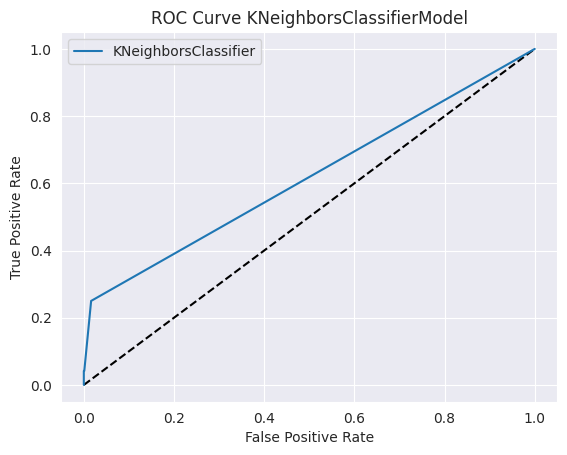

KNeighborsClassifier Model AUC Score is:  0.617128666270313


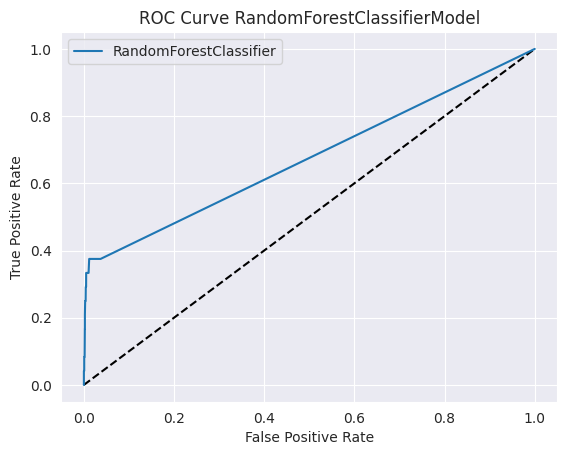

RandomForestClassifier Model AUC Score is:  0.6746123166864844


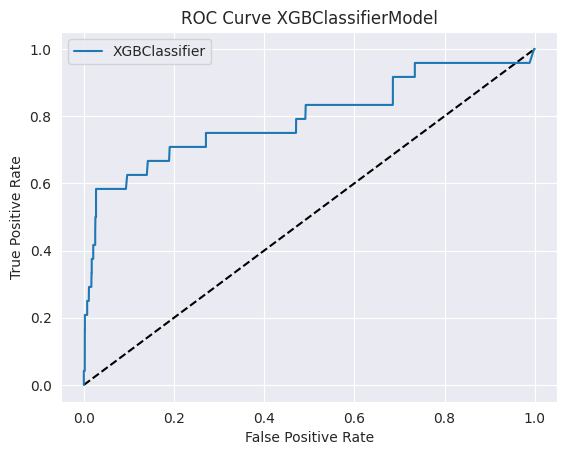

XGBClassifier Model AUC Score is:  0.7939704716607213


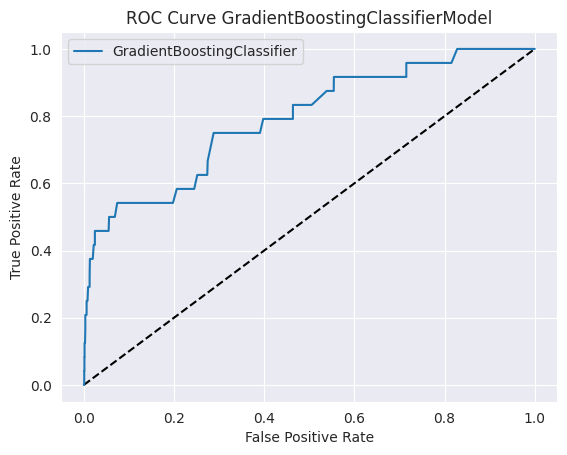

GradientBoostingClassifier Model AUC Score is:  0.7924376981767737


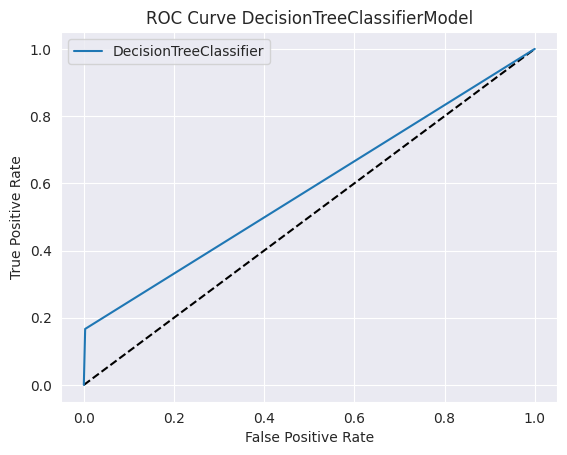

DecisionTreeClassifier Model AUC Score is:  0.5818470075307175


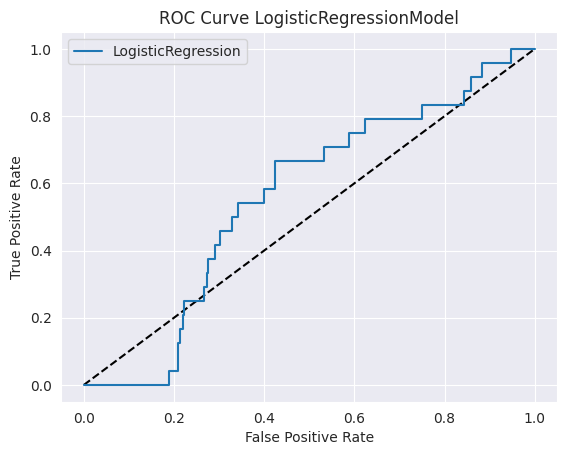

LogisticRegression Model AUC Score is:  0.5575765457788346


In [89]:
from sklearn.metrics import roc_curve, auc

models = [knn, rfc, xgb, gbc, dtc, lr]

for model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=type(model).__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve "+type(model).__name__+"Model")
    plt.legend()
    plt.show()
    print(type(model).__name__, "Model AUC Score is: ", auc(fpr, tpr))

After evaluating the performance of various models with AUC-ROC curve, I got best results with XGBoost(0.81)

## CONCLUSION

I investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated ten predictive models. The data was split in 2 parts, a train set and a test set.

I have evaluated the performance of the models using the AUC-ROC curve and other metrics. The best results were obtained with XGBoost, with an AUC score of 0.80 and a accuracy of 0.9996.